## Problem 1

Find the Chapter_12 directory (see the Preface for instructions.) This problem set will use PmagPy modules from within a Juptyer notebook. You can check the _PmagPy_nb.ipynb in the data_files/notebook directory for examples.

a) Look at the data in Chapter_12/ps12-1a.di with the functions ipmag.plot_net( ) and ipmag.plot_di( ) . Do the data look Fisher distributed to you? Now check whether they are using the program ipmag.fishqq( ) from within a notebook. Are they?

b) Repeat this exercise for Chapter_12/ps12-1b.di.

c) Now rotate the data in Chapter_12/ps12-1c.di to the mean direction. Do this by first determining the mean direction with ipmag.fisher_mean( ). Then use the function pmag.dodirot_V( ) using the mean you just calculated as the new coordinate system. Look at your output in an equal area projection – the center of the diagram will be the mean direction you used for the rotation. Why are these data not Fisherian?


In [1]:
import numpy as np
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

In [2]:
data1 = np.loadtxt('./data/ps12-1a.di')

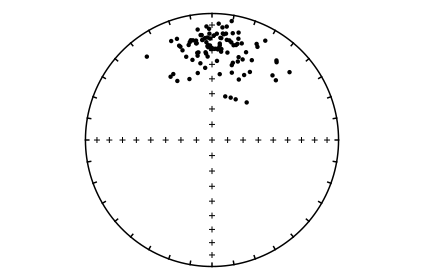

In [3]:
ipmag.plot_net()
ipmag.plot_di(di_block=data1)

{'Mode': 'Mode 1',
 'Dec': 3.295217551004112,
 'Inc': 27.6166347531046,
 'N': 100,
 'Mu': -0.5773494628875114,
 'Mu_critical': 1.207,
 'Me': 0.982803117220894,
 'Me_critical': 1.094,
 'Test_result': 'consistent with Fisherian model'}

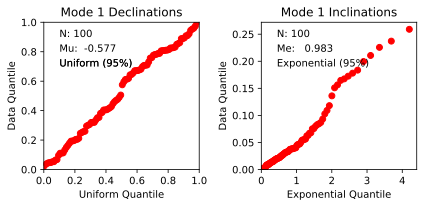

In [4]:
ipmag.fishqq(di_block=data1)

In [5]:
data2 = np.loadtxt('./data/ps12-1b.di')

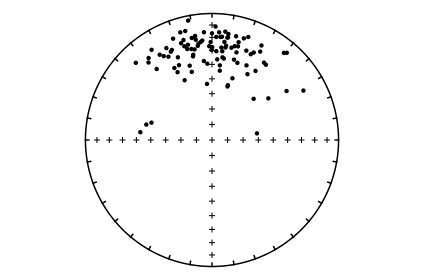

In [6]:
ipmag.plot_net()
ipmag.plot_di(di_block=data2)

{'Mode': 'Mode 1',
 'Dec': 359.64514595721926,
 'Inc': 28.98898550049806,
 'N': 100,
 'Mu': -0.05666859651886225,
 'Mu_critical': 1.207,
 'Me': 1.088422673537539,
 'Me_critical': 1.094,
 'Test_result': 'consistent with Fisherian model'}

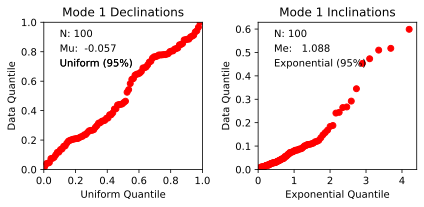

In [7]:
ipmag.fishqq(di_block=data2)

In [8]:
data2_rot = pmag.dodirot_V(data2, 359.64514595721926, 28.98898550049806)

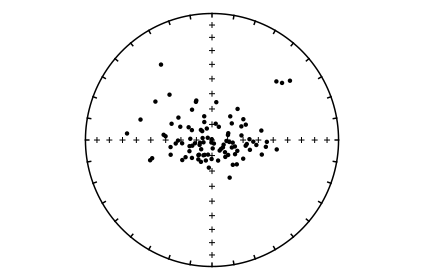

In [9]:
ipmag.plot_net()
ipmag.plot_di(di_block=data2_rot)

In [10]:
data3 = np.loadtxt('./data/ps12-1c.di')

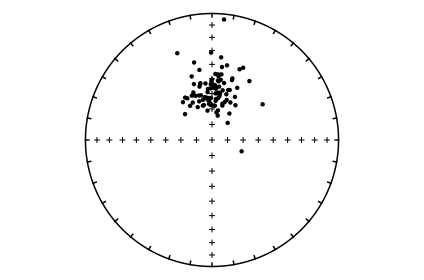

In [11]:
ipmag.plot_net()
ipmag.plot_di(di_block=data3)

{'Mode': 'Mode 1',
 'Dec': 1.5969969255887904,
 'Inc': 58.30082961647346,
 'N': 98,
 'Mu': 0.4911152394779486,
 'Mu_critical': 1.207,
 'Me': 1.4903370213439724,
 'Me_critical': 1.094,
 'Test_result': 'Fisherian model rejected'}

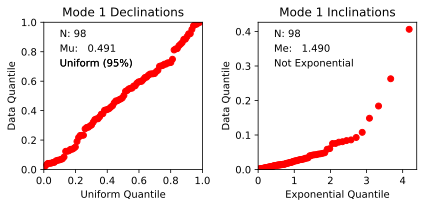

In [12]:
ipmag.fishqq(di_block=data3)

In [13]:
data3_rot = pmag.dodirot_V(data3, 1.5969969255887904, 58.30082961647346)

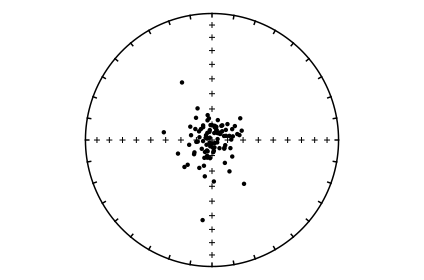

In [14]:
ipmag.plot_net()
ipmag.plot_di(di_block=data3_rot)

## Problem 2

The data in Chapter_12/ps12-2.dat are D,I, dip direction and dip where the D and I are in geographic coordinates. Use the function ipmag.bootstrap_fold_test( ) to perform a fold test. Were the data magnetized before or after folding?

In [15]:
data2 = np.loadtxt('./data/ps12-2.dat')

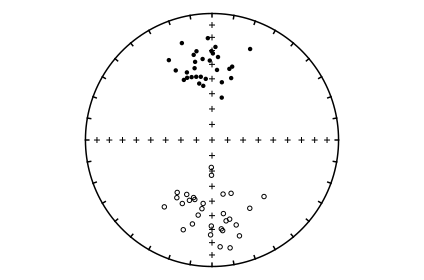

In [16]:
ipmag.plot_net()
ipmag.plot_di(di_block=data2)

({'Mode': 'Mode 1',
  'Dec': 354.21560568868586,
  'Inc': 40.43930949926174,
  'N': 30,
  'Mu': -0.18329547413643338,
  'Mu_critical': 1.207,
  'Me': 0.8841447380762644,
  'Me_critical': 1.094,
  'Test_result': 'consistent with Fisherian model'},
 {'Mode': 'Mode 2',
  'Dec': -178.07688990509325,
  'Inc': -41.41552146533816,
  'N': 30,
  'Mu': -0.22642783839769556,
  'Mu_critical': 1.207,
  'Me': 0.973261699630681,
  'Me_critical': 1.094,
  'Test_result': 'consistent with Fisherian model'})

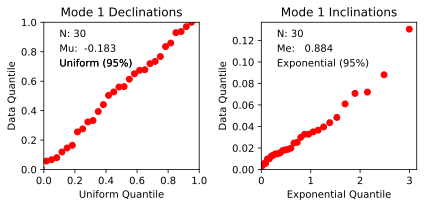

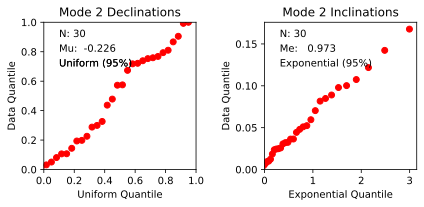

In [17]:
ipmag.fishqq(di_block=data2)

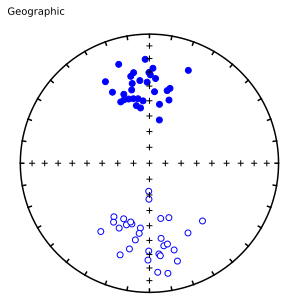

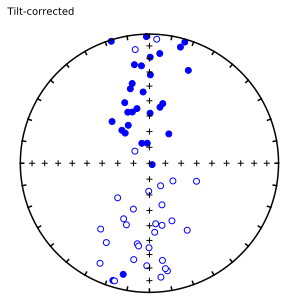

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
-2 - 19 percent unfolding
range of all bootstrap samples: 
-10  -  25 percent unfolding


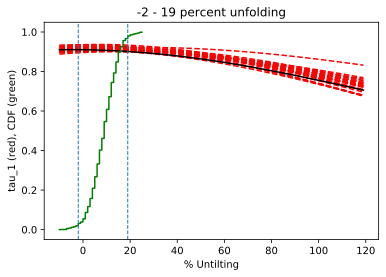

In [18]:
ipmag.bootstrap_fold_test(data2)

In [19]:
pmag.dir2cart??

Signature: pmag.dir2cart(d)
Source:   
def dir2cart(d):
    """
    Converts a list or array of vector directions in degrees (declination,
    inclination) to an array of the direction in cartesian coordinates (x,y,z)

    Parameters
    ----------
    d : list or array of [dec,inc] or [dec,inc,intensity]

    Returns
    -------
    cart : array of [x,y,z]

    Examples
    --------
    >>> pmag.dir2cart([200,40,1])
    array([-0.71984631, -0.26200263,  0.64278761])
    """
    ints = np.ones(len(d)).transpose(
    )  # get an array of ones to plug into dec,inc pairs
    d = np.array(d)
    rad = np.pi/180.
    if len(d.shape) > 1:  # array of vectors
        decs, incs = d[:, 0] * rad, d[:, 1] * rad
        if d.shape[1] == 3:
            ints = d[:, 2]  # take the given lengths
    else:  # single vector
        decs, incs = np.array(float(d[0])) * rad, np.array(float(d[1])) * rad
        if len(d) == 3:
            ints = np.array(d[2])
        else:
            ints = np.array([1.

# Problem 3

In [20]:
data4 = np.loadtxt('./data/ps12-3.dat')

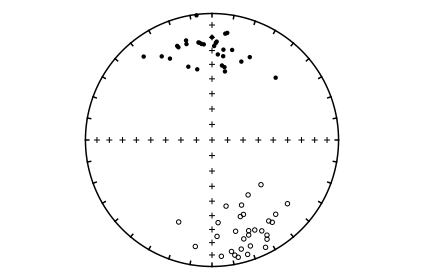

In [21]:
ipmag.plot_net()
ipmag.plot_di(di_block=data4)

In [22]:
normal_data4 = [data4[i] for i in range(len(data4)) if data4[i][1] > 0 ]
reversed_data4 = [data4[i] for i in range(len(data4)) if data4[i][1] < 0 ]
normal_data4_mean = ipmag.fisher_mean(di_block = normal_data4)
reversed_data4_mean = ipmag.fisher_mean(di_block = reversed_data4)

## Normal 

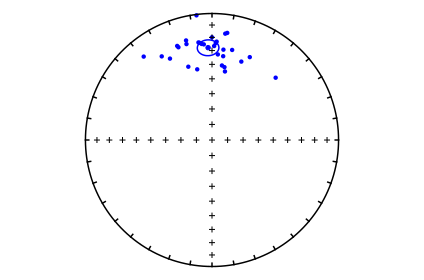

In [23]:
# plotting normal data
ipmag.plot_net()
ipmag.plot_di(di_block=normal_data4, color = 'blue')
ipmag.plot_di_mean(normal_data4_mean['dec'], normal_data4_mean['inc'], normal_data4_mean['alpha95'], color = 'blue')

{'Mode': 'Mode 1',
 'Dec': 357.5190268511044,
 'Inc': 27.75452908891596,
 'N': 30,
 'Mu': -0.38781568423302765,
 'Mu_critical': 1.207,
 'Me': 0.5254443025291103,
 'Me_critical': 1.094,
 'Test_result': 'consistent with Fisherian model'}

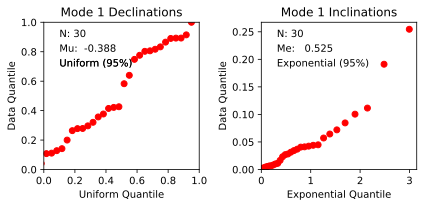

In [24]:
ipmag.fishqq(di_block=normal_data4) # they are fisherian!

In [25]:
ipmag.bingham_mean(di_block=normal_data4)

{'dec': 357.5190268511044,
 'inc': 27.75452908891596,
 'Edec': 95.25220735493313,
 'Einc': 14.343608939216118,
 'Zdec': 209.57307416526885,
 'Zinc': 58.164638338435445,
 'n': 30,
 'Zeta': 3.7980988649477414,
 'Eta': 6.574161363191656}

In [26]:
ipmag.kent_mean(di_block=normal_data4)

{'dec': 357.57284485451623,
 'inc': 27.790698496492777,
 'n': 30,
 'Zdec': 95.30293173637124,
 'Zinc': 14.317106237308186,
 'Edec': 209.55471133505026,
 'Einc': 58.145547650216855,
 'Zeta': 6.964446520663812,
 'Eta': 3.947538864884969}

In [27]:
normal_bootstrap = pmag.di_boot(normal_data4)

In [28]:
normal_bootstrap_kent_ellipse = pmag.dokent(normal_bootstrap, 1)
normal_bootstrap_kent_ellipse

{'dec': 357.6082311597567,
 'inc': 27.770006298819315,
 'n': 1,
 'Zdec': 95.73012733616241,
 'Zinc': 15.018799679443692,
 'Edec': 210.92905947321765,
 'Einc': 57.782274525242784,
 'Zeta': 6.970384002010644,
 'Eta': 3.9476104008542716}

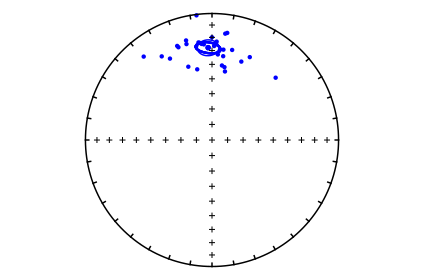

In [29]:
# plotting normal data
ipmag.plot_net()
ipmag.plot_di(di_block=normal_data4, color = 'blue')
ipmag.plot_di_mean(normal_data4_mean['dec'], normal_data4_mean['inc'], normal_data4_mean['alpha95'], color = 'blue')
ipmag.plot_di_mean_ellipse(normal_bootstrap_kent_ellipse, color = 'blue')

## Reversed

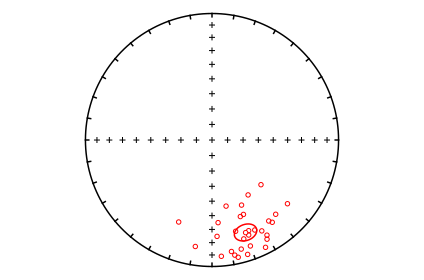

In [30]:
# plotting reversed data
ipmag.plot_net()
ipmag.plot_di(di_block=reversed_data4, color = 'red')
ipmag.plot_di_mean(reversed_data4_mean['dec'], reversed_data4_mean['inc'], reversed_data4_mean['alpha95'], color = 'red')

({},
 {'Mode': 'Mode 2',
  'Dec': 159.88257973127622,
  'Inc': -22.88212326248864,
  'N': 30,
  'Mu': -0.2703712753455117,
  'Mu_critical': 1.207,
  'Me': 0.8353509342913703,
  'Me_critical': 1.094,
  'Test_result': 'consistent with Fisherian model'})

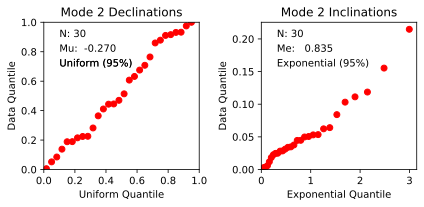

In [31]:
ipmag.fishqq(di_block=reversed_data4) # they are fisherian!

In [32]:
ipmag.bingham_mean(di_block=reversed_data4)

{'dec': 339.8825797312762,
 'inc': 22.88212326248864,
 'Edec': 233.69989880457095,
 'Einc': 33.43885575584124,
 'Zdec': 97.40210981086668,
 'Zinc': 47.59064116932741,
 'n': 30,
 'Zeta': 5.387196881747551,
 'Eta': 6.547767798385738}

In [33]:
ipmag.kent_mean(di_block=reversed_data4)

{'dec': 160.05924515863398,
 'inc': -23.16467919532718,
 'n': 30,
 'Zdec': 233.6497654593739,
 'Zinc': 33.43463143952005,
 'Edec': 97.77911650945998,
 'Einc': 47.390356077306656,
 'Zeta': 6.2903798372165705,
 'Eta': 5.558500428647894}

In [34]:
reversed_bootstrap = pmag.di_boot(reversed_data4)

In [35]:
reversed_bootstrap_kent_ellipse = pmag.dokent(reversed_bootstrap, 1)
reversed_bootstrap_kent_ellipse

{'dec': 160.08739516338946,
 'inc': -23.150192814566278,
 'n': 1,
 'Zdec': 235.38554378452937,
 'Zinc': 30.691633279928197,
 'Edec': 100.58866234343532,
 'Einc': 49.888845451565835,
 'Zeta': 6.362049821190708,
 'Eta': 5.593072953644672}

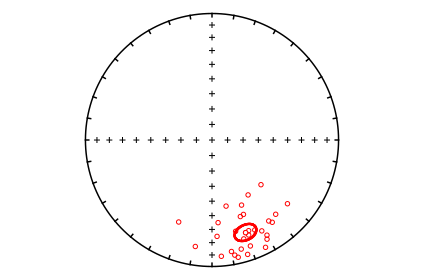

In [36]:
# plotting reversed data
ipmag.plot_net()
ipmag.plot_di(di_block=reversed_data4, color = 'red')
ipmag.plot_di_mean(reversed_data4_mean['dec'], reversed_data4_mean['inc'], reversed_data4_mean['alpha95'], color = 'red')
ipmag.plot_di_mean_ellipse(reversed_bootstrap_kent_ellipse, color = 'red')

## reversal test

In [41]:
flipped_reversed_data4 = pmag.flip(reversed_data4, combine=False)
flipped_reversed_data4

([],
 [[333.5, 5.8],
  [338.0, 23.7],
  [342.7, 5.9],
  [325.0, 22.9],
  [340.1, 11.9],
  [347.4, 5.6],
  [22.099999999999994, 30.7],
  [345.5, 26.4],
  [331.3, 19.2],
  [355.4, 8.6],
  [339.7, 35.7],
  [312.4, 46.5],
  [348.0, 45.6],
  [334.6, 22.3],
  [350.1, 11.5],
  [330.0, 14.2],
  [335.6, 42.9],
  [331.0, 11.3],
  [357.0, 24.7],
  [8.900000000000006, 15.9],
  [323.8, 20.5],
  [338.9, 20.6],
  [345.0, 11.7],
  [355.8, 34.8],
  [310.2, 23.0],
  [319.4, 23.7],
  [337.1, 36.3],
  [348.8, 8.0],
  [326.7, 46.9],
  [342.2, 19.0]])

In [37]:
# reversing the reversed polarities
flipped_reversed_data4 = pmag.flip(reversed_data4, combine=True)
# flipped_reversed_data4 = flipped_reversed_data4[1:]
# flipped_reversed_data4_dec = [flipped_reversed_data4[i][0] for i in range(len(flipped_reversed_data4))]
# flipped_reversed_data4_inc = [flipped_reversed_data4[i][1] for i in range(len(flipped_reversed_data4))]

In [38]:
flipped_reversed_data4

[[333.5, 5.8],
 [338.0, 23.7],
 [342.7, 5.9],
 [325.0, 22.9],
 [340.1, 11.9],
 [347.4, 5.6],
 [22.099999999999994, 30.7],
 [345.5, 26.4],
 [331.3, 19.2],
 [355.4, 8.6],
 [339.7, 35.7],
 [312.4, 46.5],
 [348.0, 45.6],
 [334.6, 22.3],
 [350.1, 11.5],
 [330.0, 14.2],
 [335.6, 42.9],
 [331.0, 11.3],
 [357.0, 24.7],
 [8.900000000000006, 15.9],
 [323.8, 20.5],
 [338.9, 20.6],
 [345.0, 11.7],
 [355.8, 34.8],
 [310.2, 23.0],
 [319.4, 23.7],
 [337.1, 36.3],
 [348.8, 8.0],
 [326.7, 46.9],
 [342.2, 19.0]]

In [39]:
ipmag.common_mean_watson(Data1 = flipped_reversed_data4, Data2 = normal_data4) # failed

Results of Watson V test: 

Watson's V:           23.3
Critical value of V:  6.3
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 16.5
Critical angle for M&M1990:   8.5



(0, 16.455363186136953, 8.532908212668092)

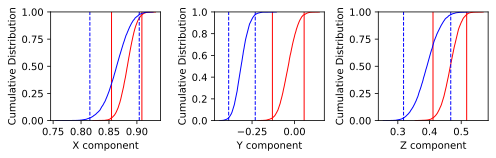

In [40]:
ipmag.reversal_test_bootstrap(di_block=data4) # failed